In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data from:
https://datausa.io/profile/geo/austin-tx/#economy

In [4]:
path = '../../Appendix_A_Resources/Quick_pop_data/Employment by Occupations.csv'

employ_df = pd.DataFrame(pd.read_csv(path))

employ_df = employ_df.sort_values('Year', ascending=False)

employ_df.head()

,ID Group,Group,ID Subgroup,Subgroup,ID Occupation,Occupation,ID Year,Year,ID State,State,Workforce by Occupation and Gender,Workforce by Occupation and Gender Moe,Geography,ID Geography,Slug Geography
0,2,Sales & Office Occupations,6,Sales & Office Occupations,18,Office & Administrative Support Occupations,2018,2018,04000US48,Texas,56011,4357.113953,"Austin, TX",16000US4805000,austin-tx
13,0,"Management, Business, Science, & Arts Occupations",2,"Education, Legal, Community Service, Arts, & M...",6,Legal Occupations,2018,2018,04000US48,Texas,12147,2194.754884,"Austin, TX",16000US4805000,austin-tx
1,4,"Production, Transportation, & Material Moving ...",8,"Production, Transportation, & Material Moving ...",24,Material Moving Occupations,2018,2018,04000US48,Texas,11693,2247.840074,"Austin, TX",16000US4805000,austin-tx
24,1,Service Occupations,4,Service Occupations,14,Food Preparation & Serving Related Occupations,2018,2018,04000US48,Texas,36964,4168.113722,"Austin, TX",16000US4805000,austin-tx
23,1,Service Occupations,4,Service Occupations,11,Healthcare Support Occupations,2018,2018,04000US48,Texas,11644,2526.950732,"Austin, TX",16000US4805000,austin-tx


In [5]:
workforce_dict = {}

for index, row in employ_df.iterrows():
    if row['Occupation'] not in workforce_dict:
        workforce_dict[row['Occupation']]={}
        workforce_dict[row['Occupation']][row['Year']]=row['Workforce by Occupation and Gender']
    else:
        workforce_dict[row['Occupation']][row['Year']]=row['Workforce by Occupation and Gender']

workforce_df = pd.DataFrame(data=workforce_dict).T

workforce_df = workforce_df.sort_values(2018, ascending=False)

# workforce_df = workforce_df.drop(index=('Total'))

workforce_df.head()

,2018,2017,2016,2015,2014,2013
Management Occupations,71665,72616,74670,65044,57600,56613
Sales & Related Occupations,57567,59951,65740,56350,55564,50860
Office & Administrative Support Occupations,56011,57474,54399,60448,54742,58949
Business & Financial Operations Occupations,45718,33633,37096,30940,30324,30210
Computer & Mathematical Occupations,39421,38423,31644,35617,33792,26975


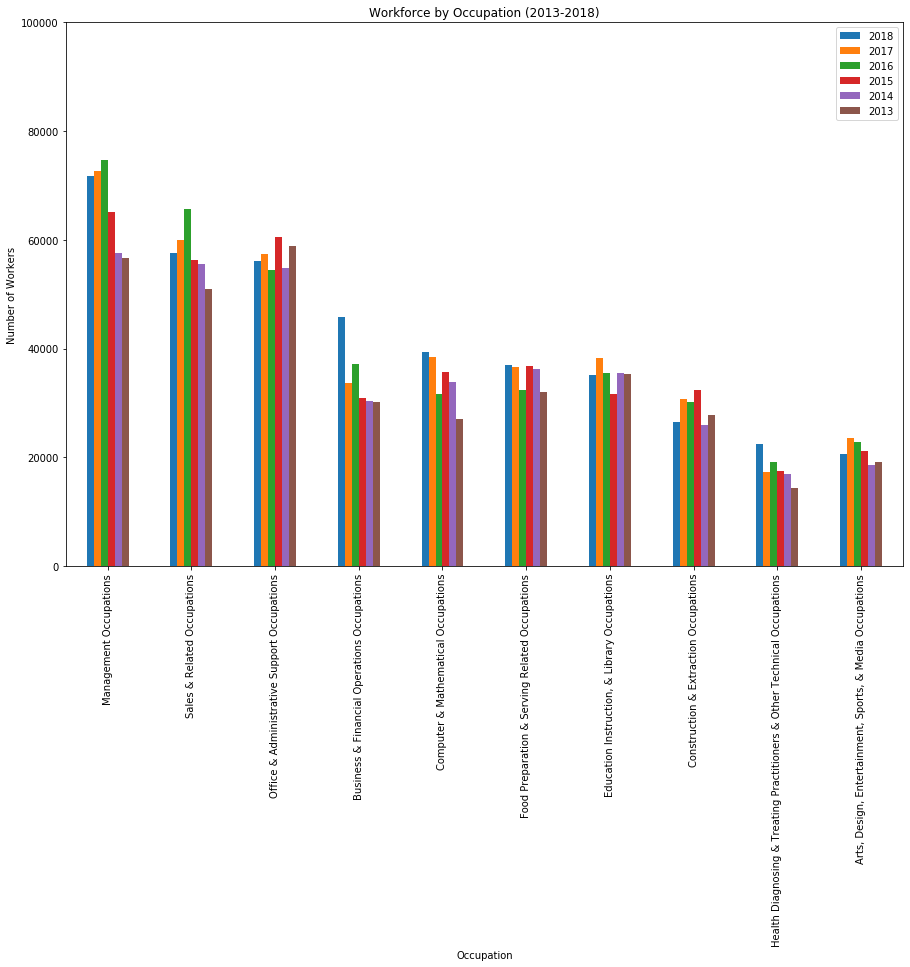

In [6]:
workforce_df.head(10).plot(kind='bar', figsize=(15,10), title='Workforce by Occupation (2013-2018)')
plt.xlabel('Occupation')
plt.ylabel('Number of Workers')
plt.xticks(rotation=90)
plt.ylim(0,100000)
plt.savefig('../../Appendix_B_Output_Data/Workforce_Top.png')

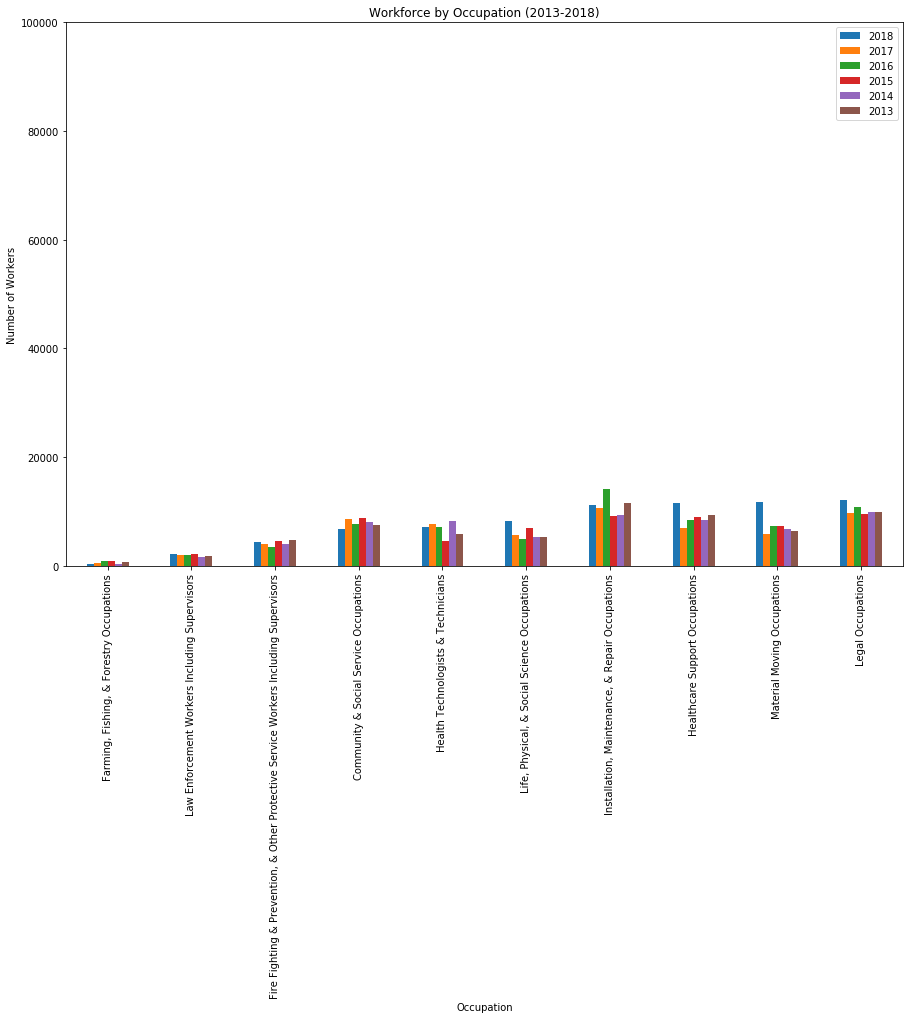

In [10]:
workforce_df = workforce_df.sort_values(2018, ascending=True)

workforce_df.head(10).plot(kind='bar', figsize=(15,10), title='Workforce by Occupation (2013-2018)')
plt.xlabel('Occupation')
plt.ylabel('Number of Workers')
plt.xticks(rotation=90)
plt.ylim(0,100000)
plt.savefig('../../Appendix_B_Output_Data/Workforce_Bottom.png')

In [11]:
path2 = '../../Appendix_A_Resources/Quick_pop_data/Highest Paid.csv'

pay_df = pd.DataFrame(pd.read_csv(path2))

pay_df = pay_df.sort_values('Year')

pay_df

,ID Occupation,Occupation,ID Year,Year,Median Earnings by Occupation,Median Earnings by Occupation Moe,Geography,ID Geography,Slug Geography
127,10,Community & Social Service Occupations,2013,2013,34158,5477,"Austin, TX",16000US4805000,austin-tx
130,0,Total,2013,2013,32599,1691,"Austin, TX",16000US4805000,austin-tx
57,14,Healthcare Practitioners & Technical Occupations,2013,2013,54281,6784,"Austin, TX",16000US4805000,austin-tx
30,5,"Computer, Engineering, & Science Occupations",2013,2013,67656,4054,"Austin, TX",16000US4805000,austin-tx
31,15,Health Diagnosing & Treating Practitioners & O...,2013,2013,66342,5522,"Austin, TX",16000US4805000,austin-tx
...,...,...,...,...,...,...,...,...,...
144,30,Construction & Extraction Occupations,2018,2018,30527,2853,"Austin, TX",16000US4805000,austin-tx
145,34,Transportation Occupations,2018,2018,30519,3506,"Austin, TX",16000US4805000,austin-tx
149,18,Healthcare Support Occupations,2018,2018,30179,2173,"Austin, TX",16000US4805000,austin-tx
76,0,Total,2018,2018,44624,1865,"Austin, TX",16000US4805000,austin-tx


In [12]:
jobs_dict = {}

for index, row in pay_df.iterrows():
    if row['Occupation'] not in jobs_dict:
        jobs_dict[row['Occupation']]={}
        jobs_dict[row['Occupation']][row['Year']]=row['Median Earnings by Occupation']
    else:
        jobs_dict[row['Occupation']][row['Year']]=row['Median Earnings by Occupation']

income_df = pd.DataFrame(data=jobs_dict)

total = income_df['Total']

income_df = income_df.T

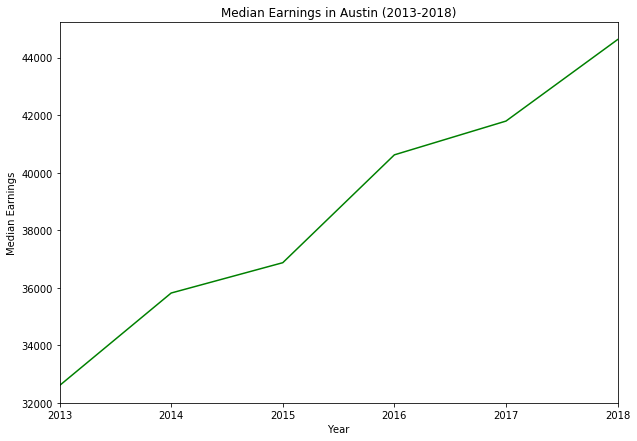

In [13]:
total.plot(kind='line',title='Median Earnings in Austin (2013-2018)',c='g', figsize=(10,7))
plt.xlabel('Year')
plt.ylabel('Median Earnings')
plt.savefig('../../Appendix_B_Output_Data/Median_Earnings.png')

In [14]:
income_df['Total Change'] = income_df[2018]-income_df[2013]

income_df = income_df.sort_values('Total Change', ascending=False)

income_job = income_df.drop(index=('Total'))

change = income_job['Total Change']

avg_change = income_job['Total Change'].mean()

cost_living = 55000

Average Change in Median Income: 6862.257142857143


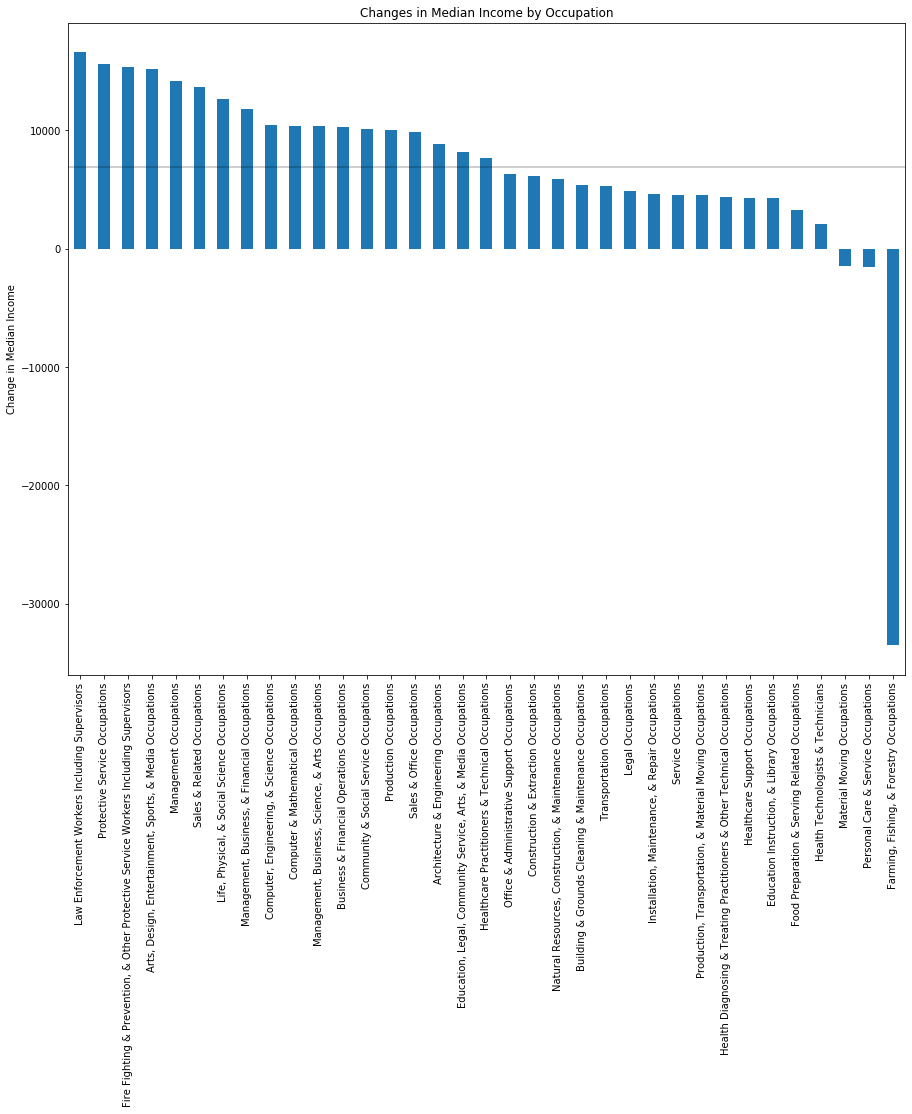

In [15]:
change.plot(kind='bar', figsize=(15,12))
plt.title('Changes in Median Income by Occupation')
plt.ylabel('Change in Median Income')
plt.axhline(y=avg_change,alpha=.25,c='black')
print(f'Average Change in Median Income: {avg_change}')
plt.savefig('../../Appendix_B_Output_Data/Income_Change.png')

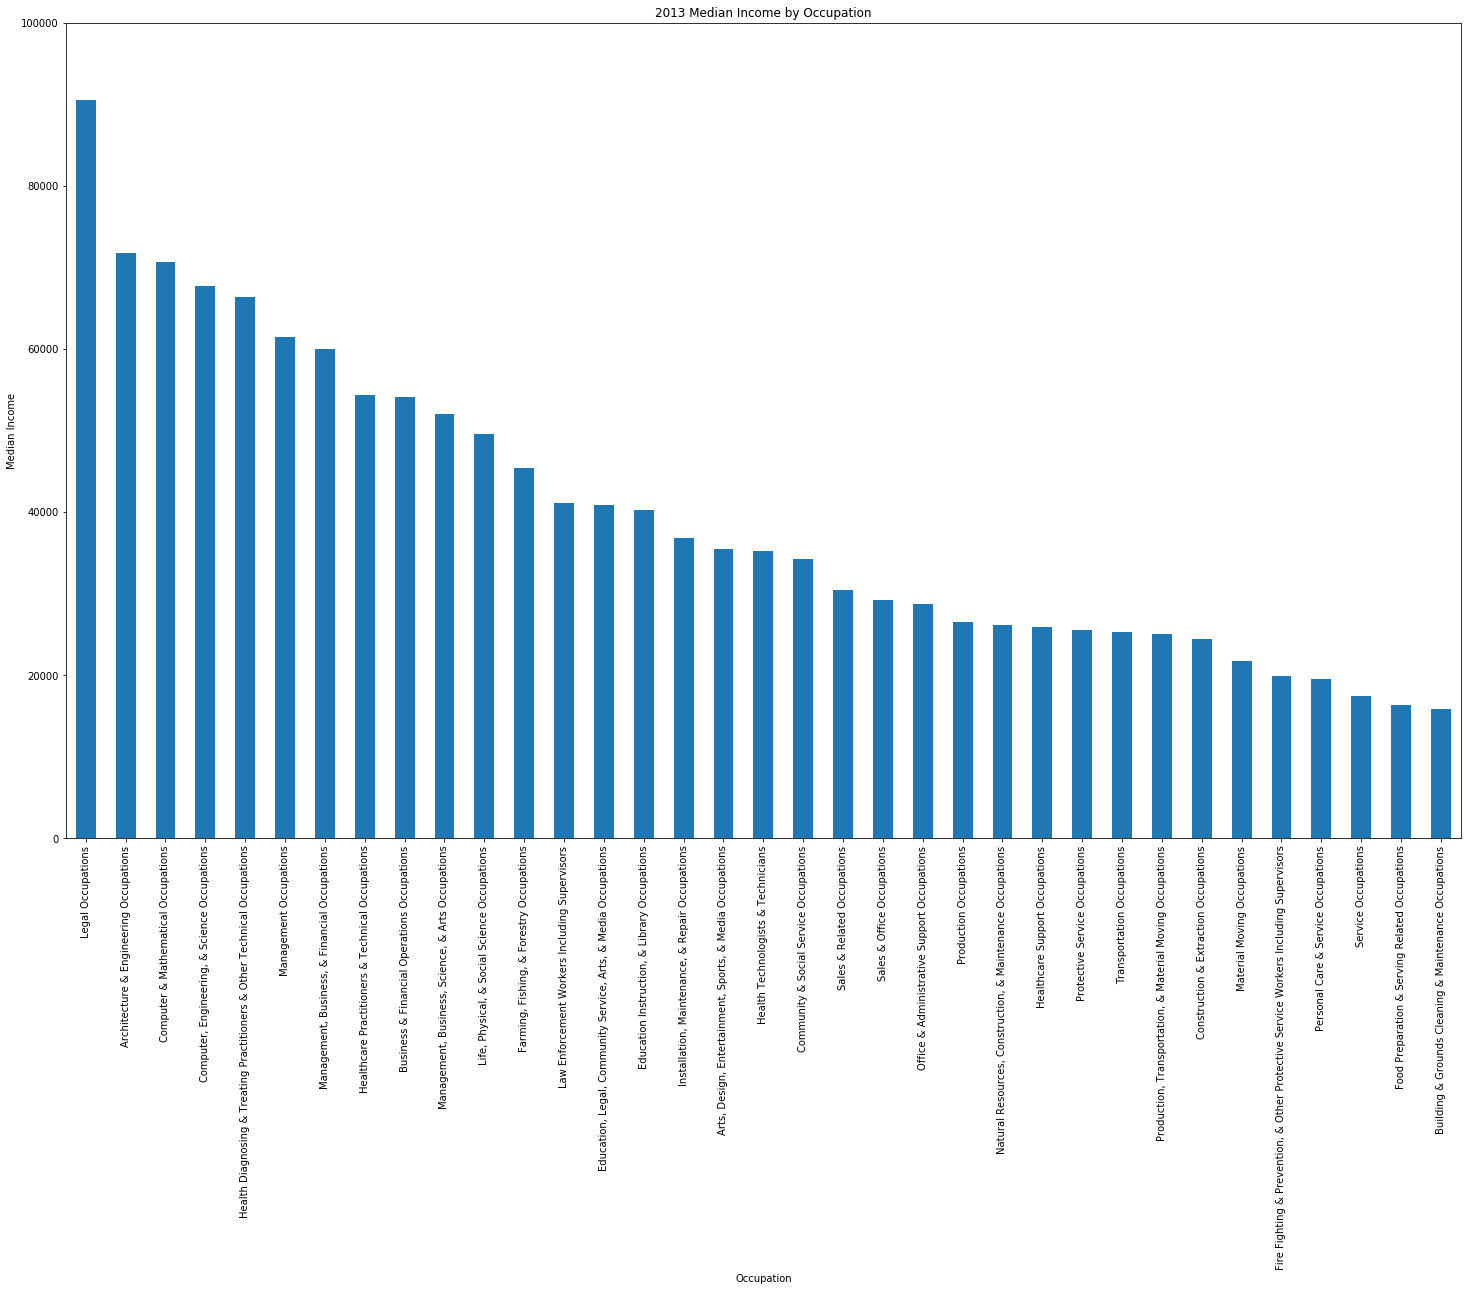

In [16]:
income_job = income_job.sort_values(2013, ascending=False)

income_job[2013].plot(kind='bar',figsize=(25,15))
plt.title('2013 Median Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Median Income')
plt.ylim(0,100000)
plt.savefig('../../Appendix_B_Output_Data/2013_income.png',dpi=100,bbox_inches='tight')

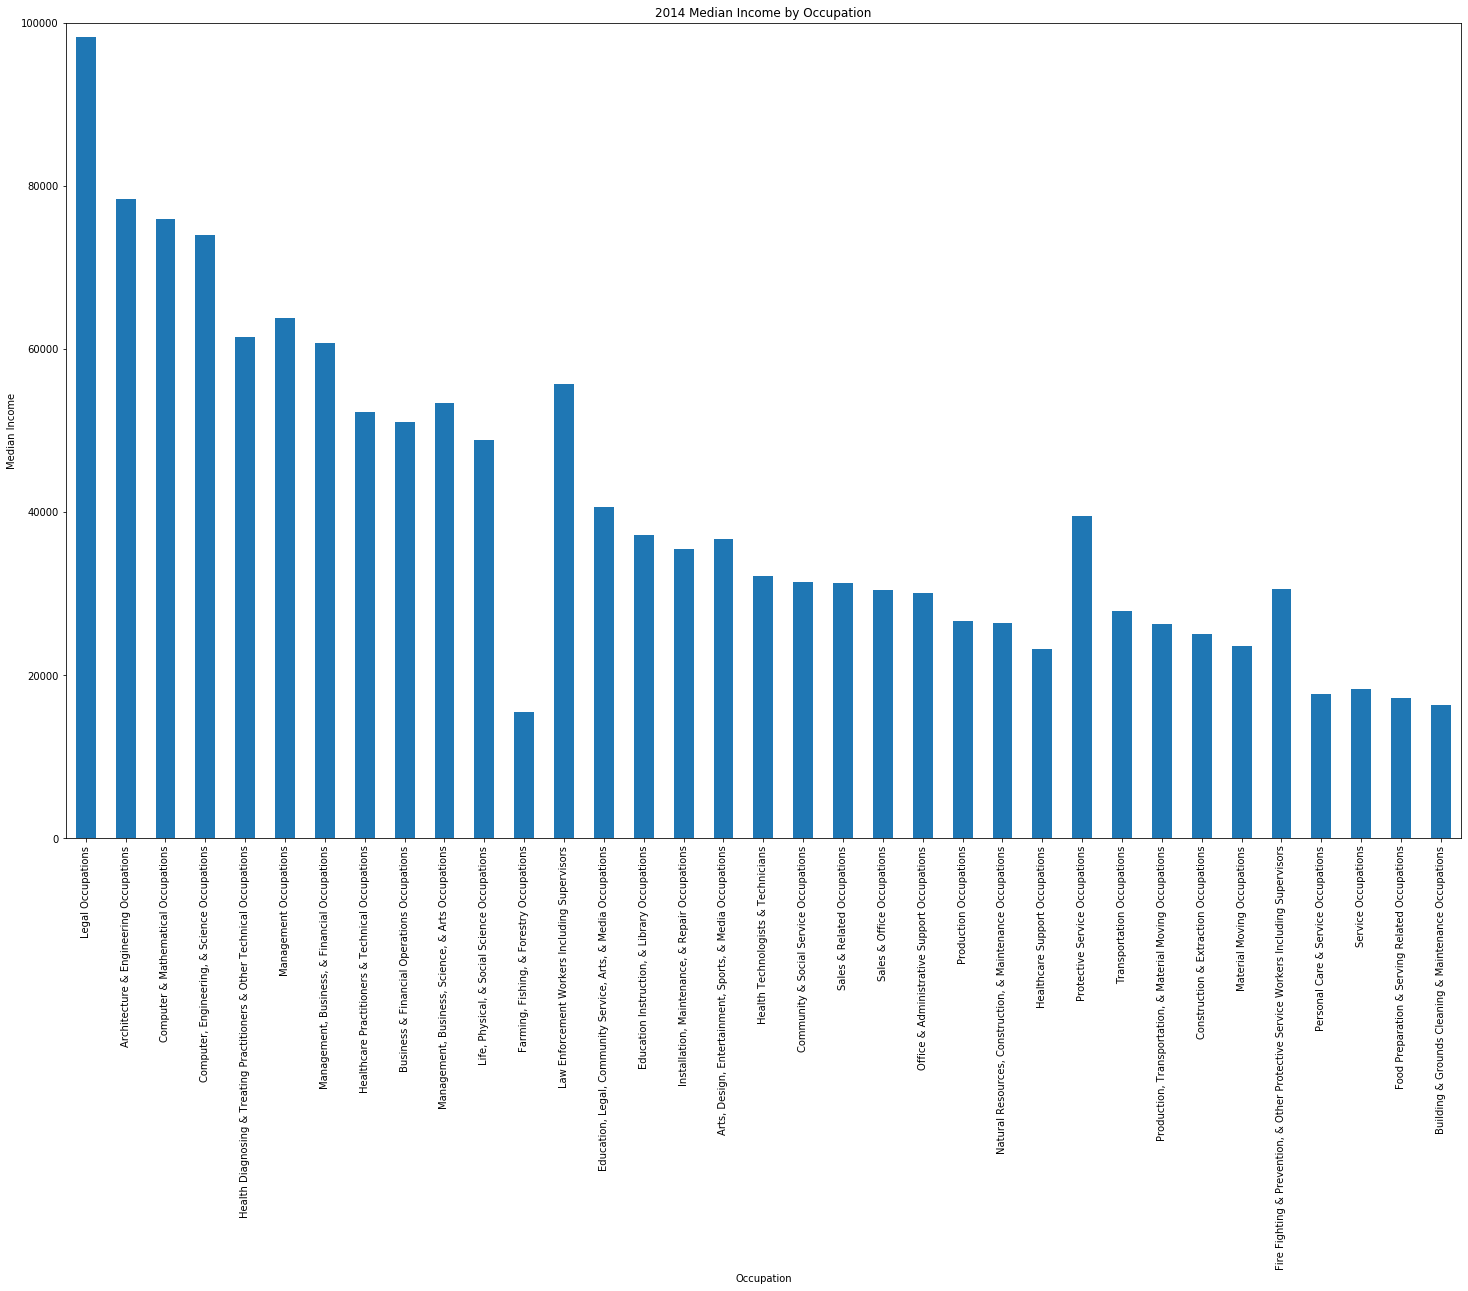

In [17]:
income_job[2014].plot(kind='bar',figsize=(25,15))
plt.title('2014 Median Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Median Income')
plt.ylim(0,100000)
plt.savefig('../../Appendix_B_Output_Data/2014_income.png')

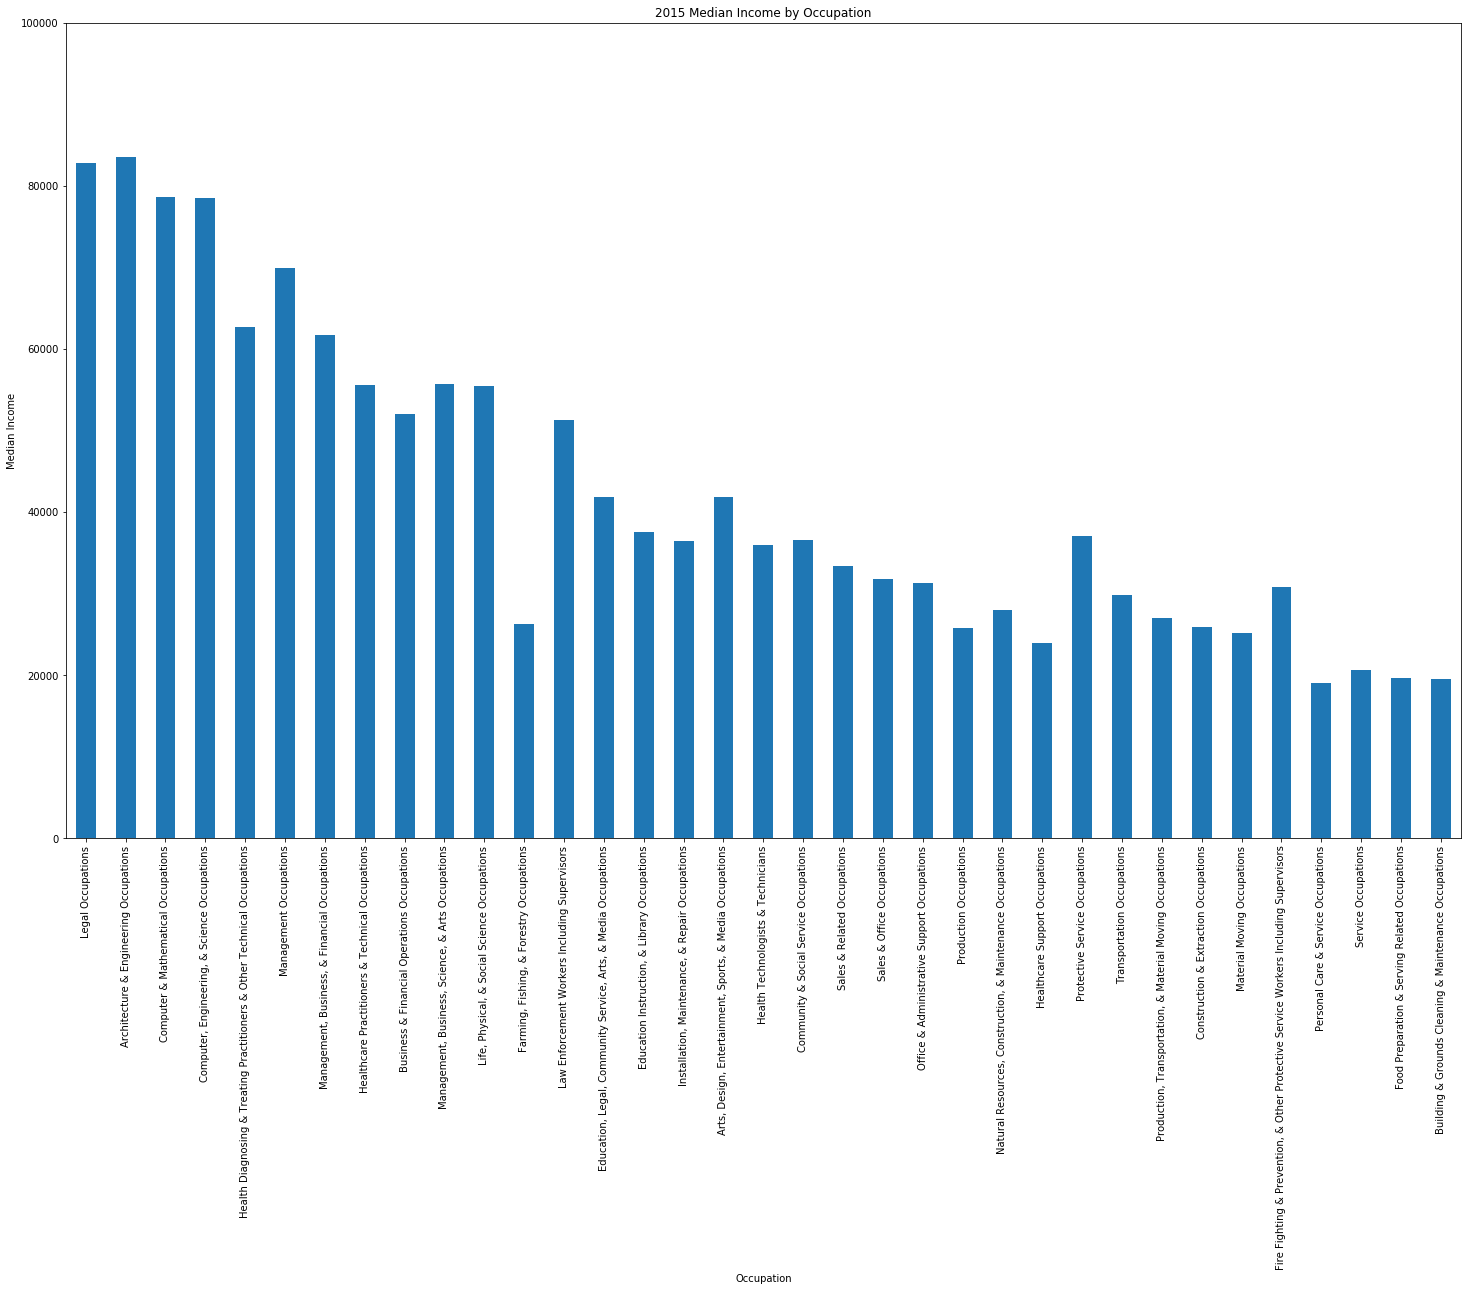

In [18]:
income_job[2015].plot(kind='bar',figsize=(25,15))
plt.title('2015 Median Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Median Income')
plt.ylim(0,100000)
plt.savefig('../../Appendix_B_Output_Data/2015_income.png')

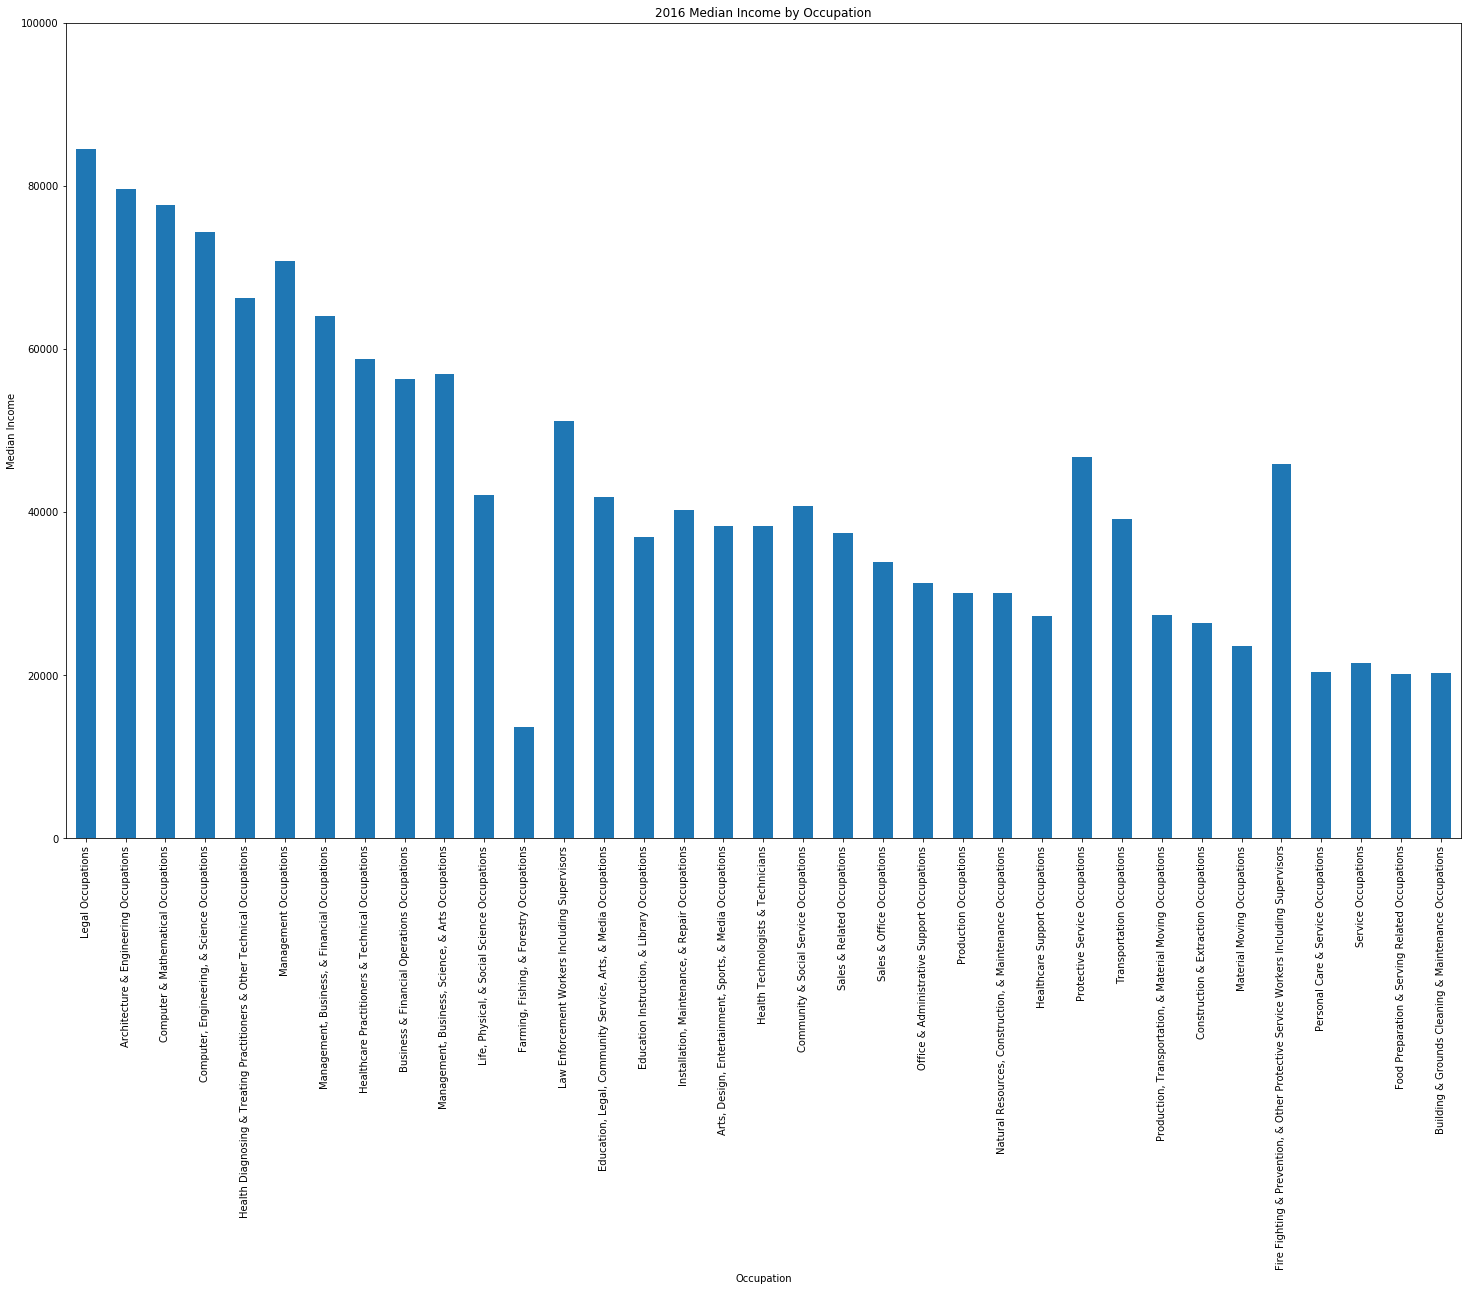

In [19]:
income_job[2016].plot(kind='bar',figsize=(25,15))
plt.title('2016 Median Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Median Income')
plt.ylim(0,100000)
plt.savefig('../../Appendix_B_Output_Data/2016_income.png')

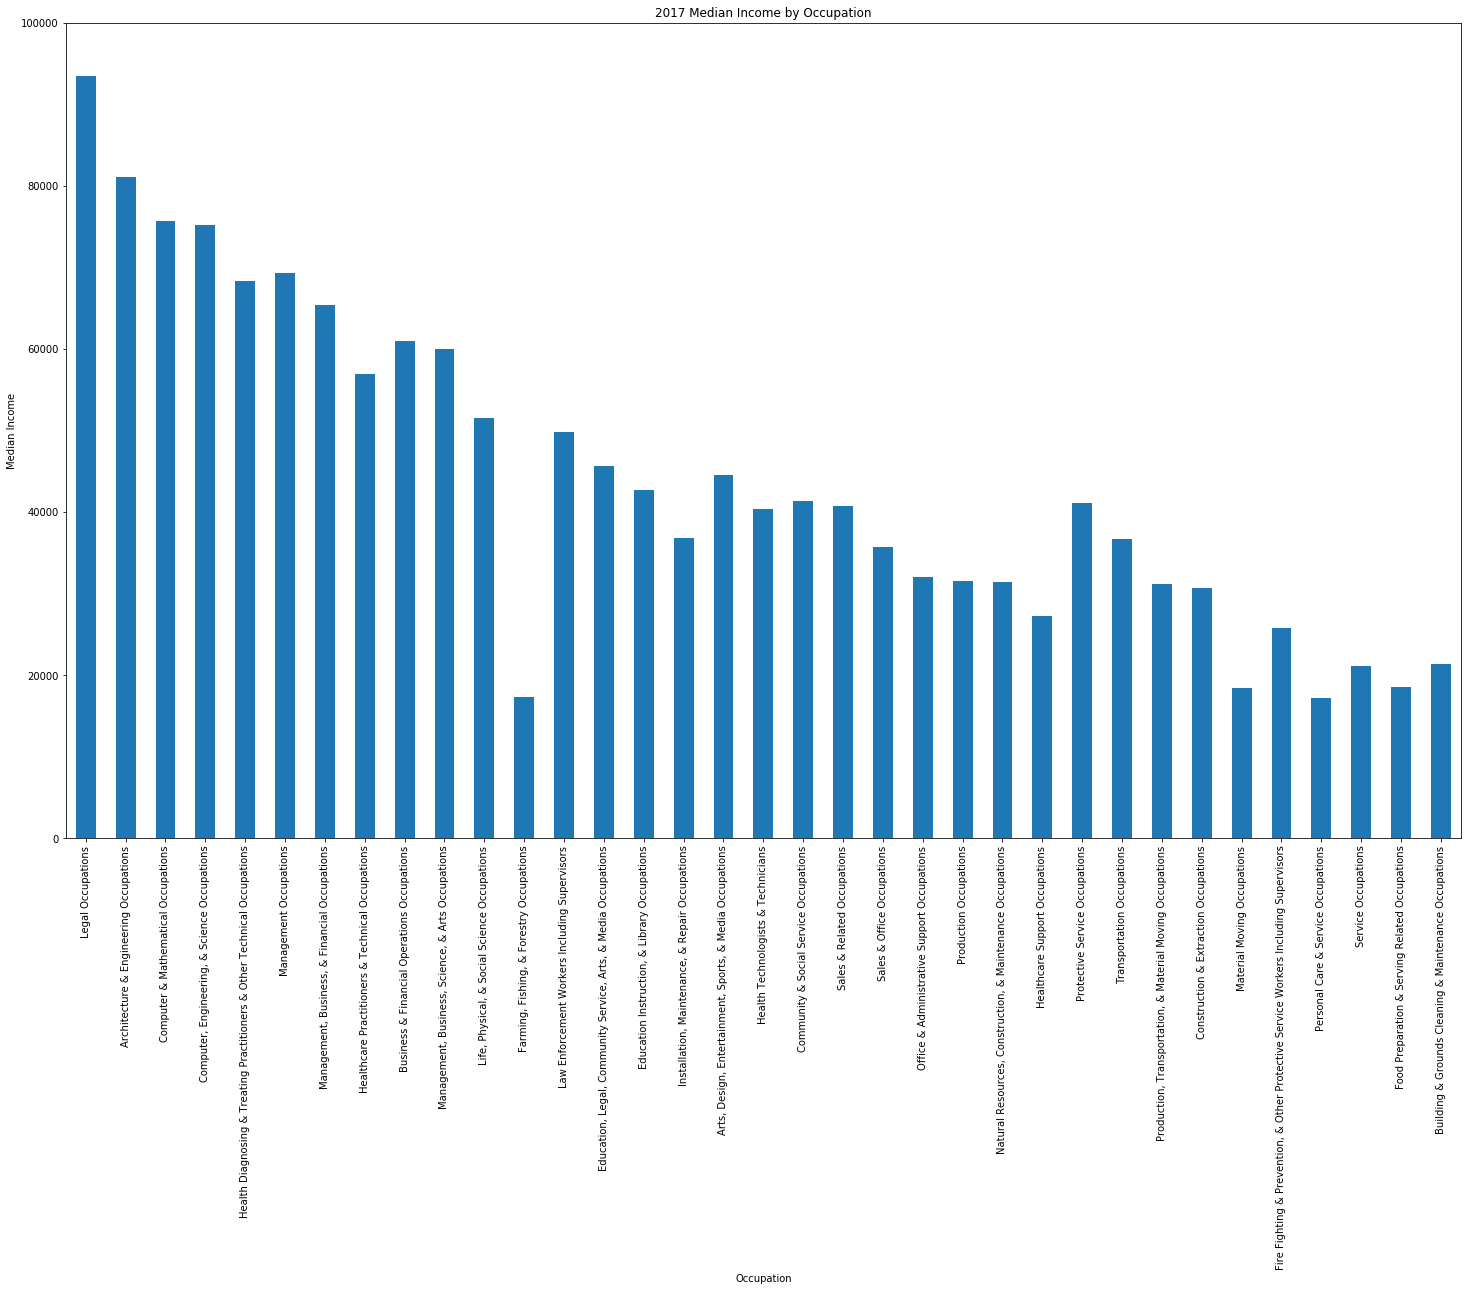

In [20]:
income_job[2017].plot(kind='bar',figsize=(25,15))
plt.title('2017 Median Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Median Income')
plt.ylim(0,100000)
plt.savefig('../../Appendix_B_Output_Data/2017_income.png')

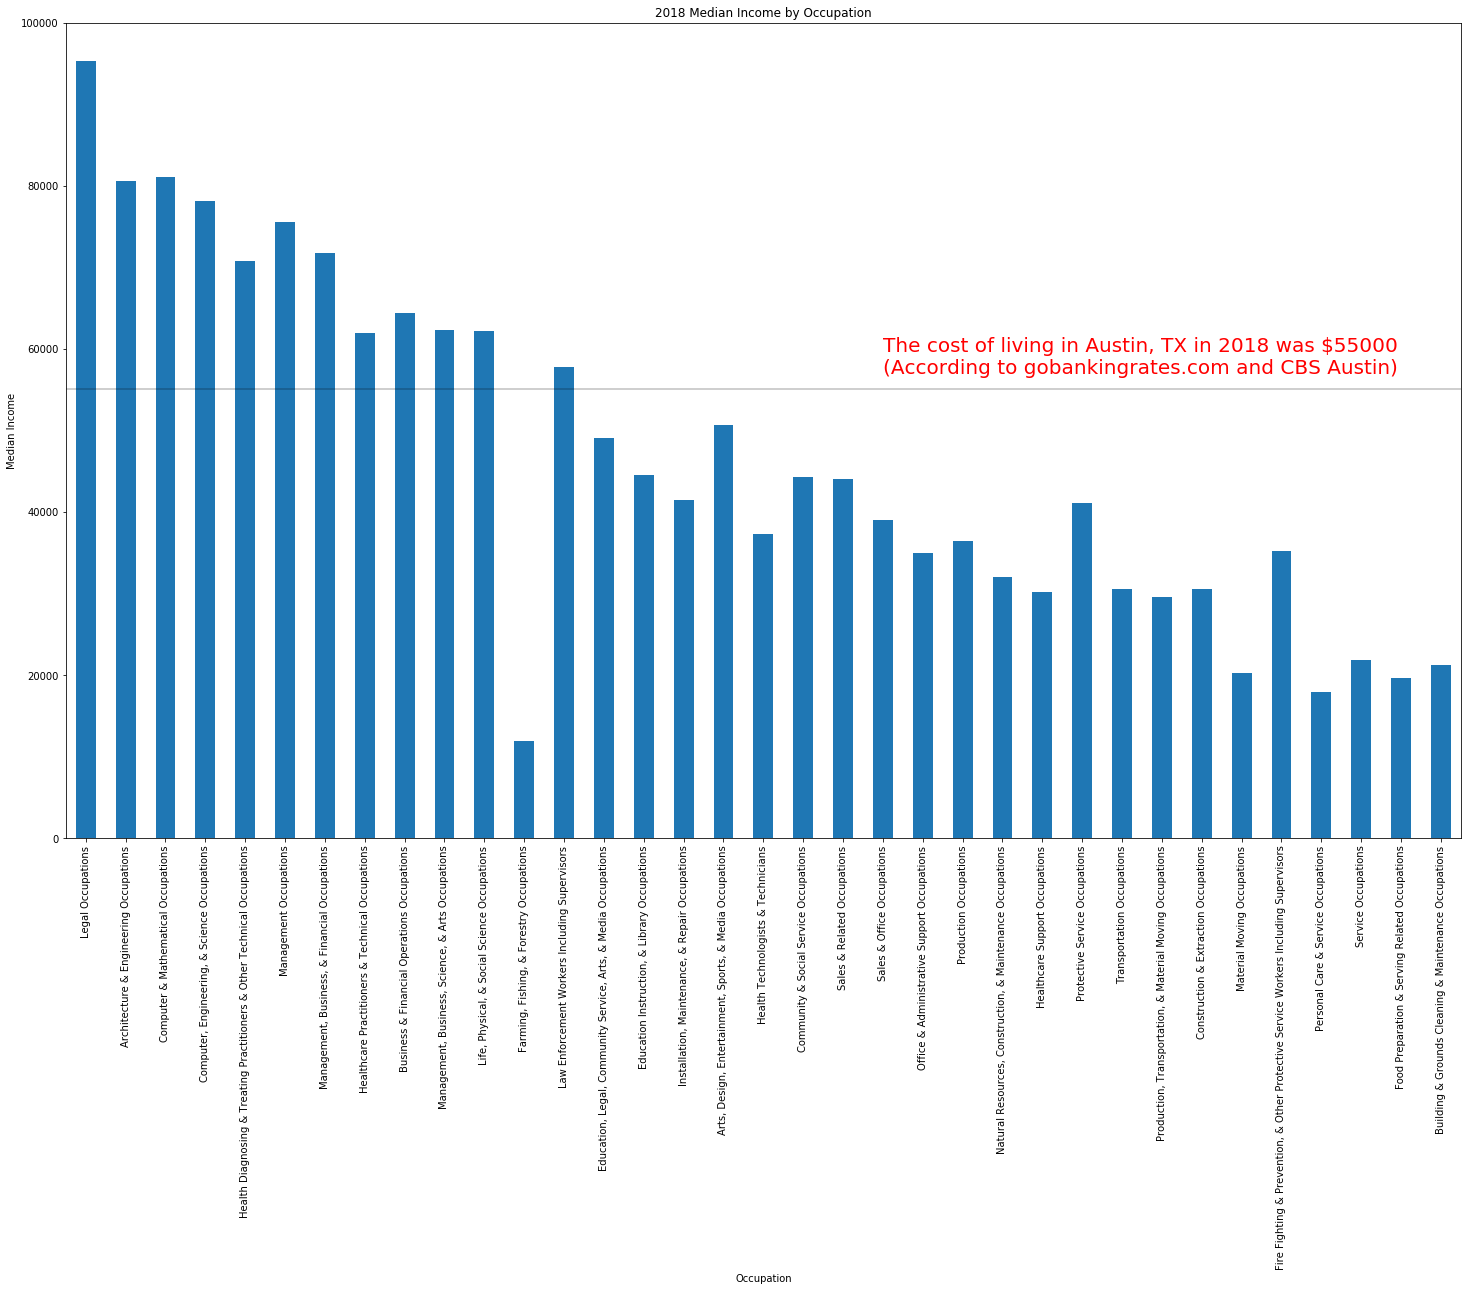

In [22]:
income_job[2018].plot(kind='bar',figsize=(25,15))
plt.title('2018 Median Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Median Income')
plt.ylim(0,100000)
plt.axhline(y=cost_living,alpha=.25,c='black')
col = (f'The cost of living in Austin, TX in 2018 was ${cost_living}\n(According to gobankingrates.com and CBS Austin)')
plt.annotate(col,c='r',xy=(20,57000),fontsize=20)
plt.savefig('../../Appendix_B_Output_Data/2018_income.png',dpi=100,bbox_inches='tight')